In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [67]:
df = pd.read_csv('smartphone_cleaned_v5.csv')
print(df.shape)
df['resolution'] = df['resolution'].str.replace('\u2009', ' ')
df.head()

(980, 25)


,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


### Reasons to do EDA on this particular dataset
1. If you want to publish a blog
- Title - An analytical study into the world of smartphones 
- When performed EDA what was found __________

2. ML predictive model
- When you put specs, website gives you the price,
- price will be target

3. Many missing values
- goal is to fill them then EDA is necessary

4. Detect outliers

This notebook's goal is to 2. build predictive model for the price

In [68]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [69]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


### brand name

In [70]:
# brand_name looks straightaway as categorical col
# for cat. col we often do value_counts() for freq. count 
# Plot count plot
# plot pie chart
df['brand_name'].value_counts()

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: count, dtype: int64

<Axes: xlabel='brand_name'>

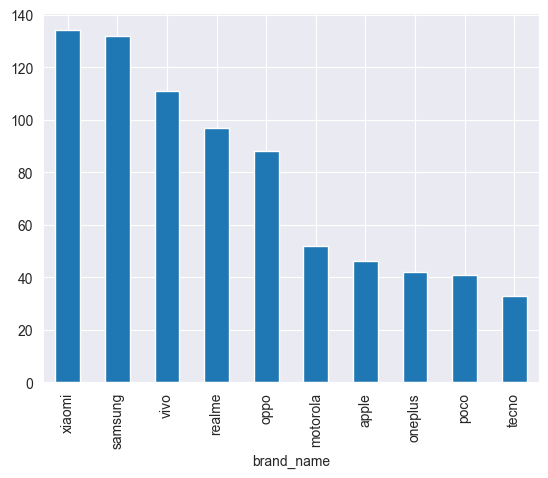

In [71]:
# plot a graph of top 10 brands
df['brand_name'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='count'>

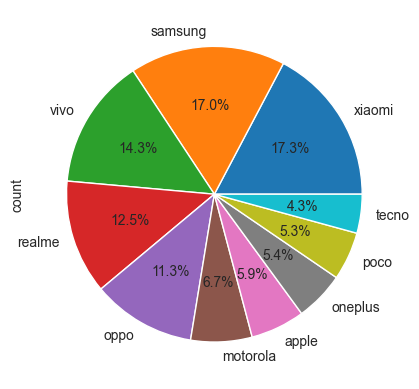

In [72]:
# phones available.
# NOT phones sold or marker capture
df['brand_name'].value_counts().head(10).plot(kind='pie', autopct='%0.1f%%')

In [73]:
df['brand_name'].isnull().sum()

0

### model

In [74]:
# model is a mixed col so we cannot do much
df['model'].nunique()
# Each phone is unique
# supporting col
# will not become input for user

980

### price
numerical col 

1. univariate

- mean, median, min, max, 25, 75th percentile

2. distribution

- hist, kde, box (outliers) plots

3. missing values

- fill


Conclusions
- Distribution is not normal, heavily skewed
- Lot of outliers


learning points after calculating phones more than 200000
- When we know the reason for removing these, then only we remove
- reason for this is they have gold diamond and other are custom made

In [75]:
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

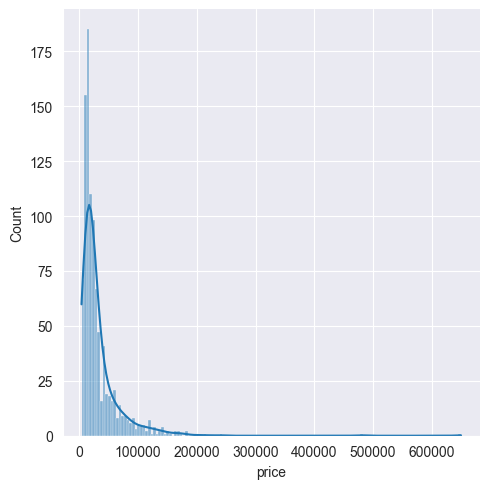

In [76]:
# mean std cannot be that high, - missing values
# mean and median is not near to each other
# max has a crazy big number
sns.displot(df, kind='hist', x='price', kde=True)

In [77]:
# near 0 for normal
# we cannot run normal distribution plots because it is highly skewed
df['price'].skew()

6.591790999665567

<Axes: ylabel='price'>

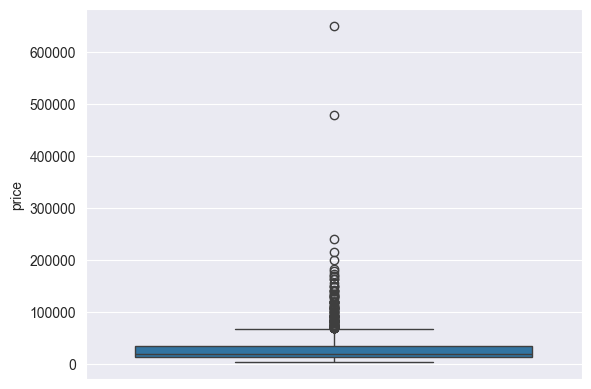

In [78]:
sns.boxplot(df['price'])

In [79]:
df[df['price'] > 200000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.50,2275.0,0,NaN,2.0,64.0,4.70,60,1080 x 1920,1,1.0,android,13.0,2.1,0,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,8.0,3.20,4700.0,1,66.0,12.0,512.0,6.74,120,1212 x 2616,3,1.0,other,50.0,13.0,1,256.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.80,4000.0,1,27.0,8.0,256.0,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,0,NaN
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,kirin,8.0,2.86,4500.0,1,NaN,12.0,512.0,6.53,60,1176 x 2400,4,2.0,android,40.0,32.0,1,256.0


In [80]:
# When we know the reason for removing these, then only we remove
# reason for this high price is they have gold, diamond and other models are custom made

### rating



conclusions 
- Distribution is near to normal
- Many missing values 10%

In [81]:
# balanced
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

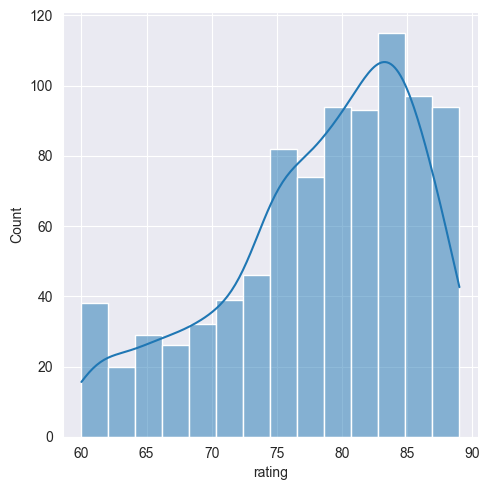

In [82]:
sns.displot(df, kind='hist', x='rating', kde=True)

In [83]:
# close to 0, i.e. normal
df['rating'].skew()

-0.6989993034105535

<Axes: ylabel='rating'>

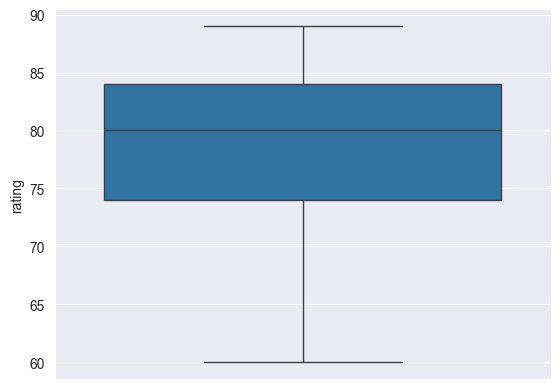

In [84]:
sns.boxplot(df['rating'])

In [85]:
(df['rating'].isnull().sum() / 980) * 100

10.306122448979592

### has_5g
categorical col

- take value_counts() and plot count plot
- pie chart

<Axes: ylabel='count'>

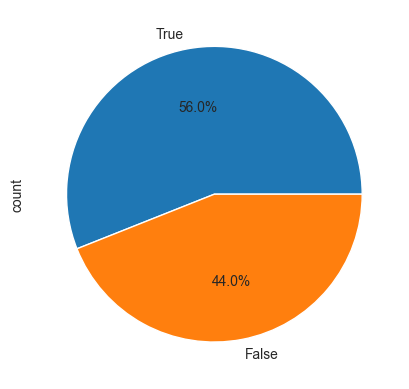

In [86]:
df['has_5g'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

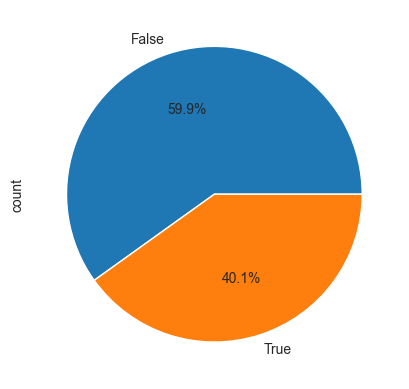

In [87]:
# has_nfc
df['has_nfc'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

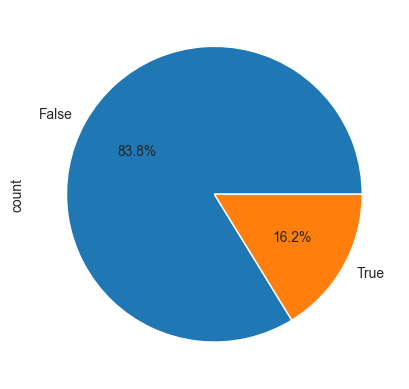

In [88]:
# has_ir_blaster
df['has_ir_blaster'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [89]:
# chinese phones have ir_blaster feature
df[df['has_ir_blaster'] == True]['brand_name'].value_counts()

brand_name
xiaomi     109
poco        30
iqoo         6
huawei       6
vivo         4
redmi        2
honor        1
samsung      1
Name: count, dtype: int64

### pie charts of all categorical cols

<Axes: ylabel='count'>

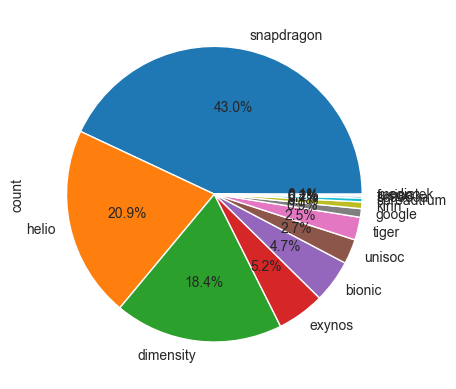

In [90]:
df['processor_brand'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

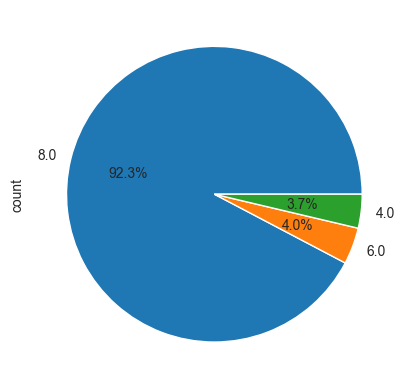

In [91]:
# this won't contribute much to the prediction
df['num_cores'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

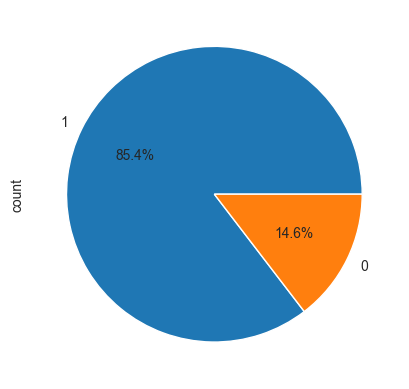

In [92]:
df['fast_charging_available'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

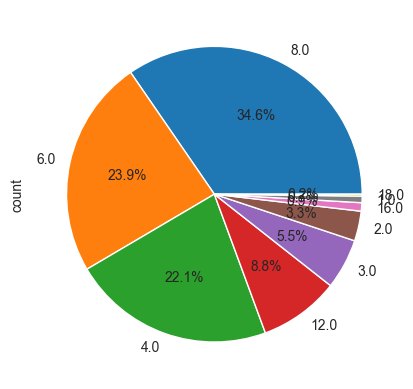

In [93]:
df['ram_capacity'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

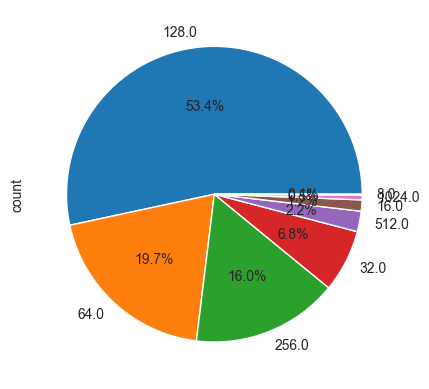

In [94]:
df['internal_memory'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

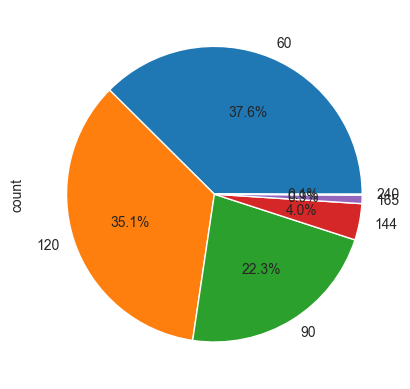

In [95]:
df['refresh_rate'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [96]:
# check this row
df[df['refresh_rate'] == 240]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
784,leitz,Leitz Phone 2,124990,89.0,True,True,False,snapdragon,8.0,3.0,5000.0,1,NaN,12.0,256.0,6.6,240,1260 x 2730,2,1.0,android,47.2,12.6,1,1024.0


In [97]:
# feature engineering idea
# we can convert the resolution column to HD and FULL HD columns
# calculate ppi with screen_size and resolution

<Axes: ylabel='count'>

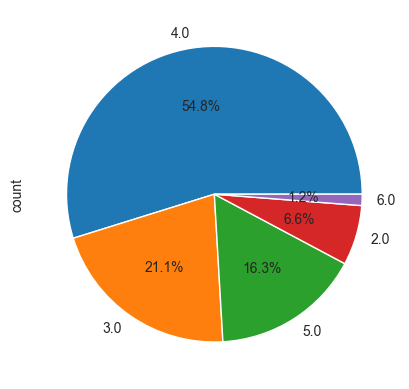

In [98]:
# camera
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

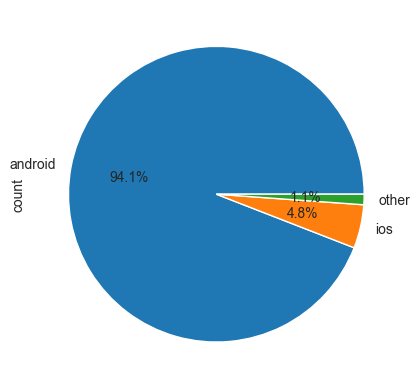

In [99]:
df['os'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

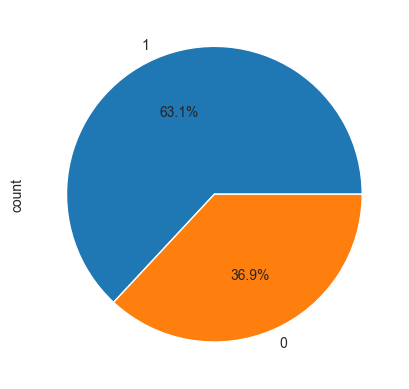

In [100]:
df['extended_memory_available'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

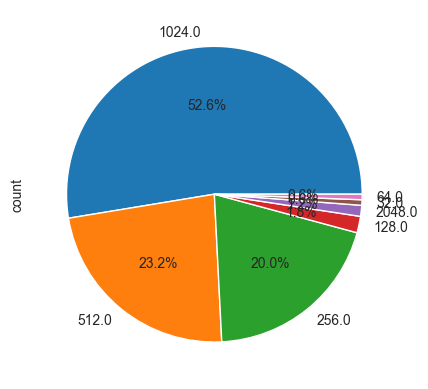

In [101]:
df['extended_upto'].value_counts().plot(kind='pie', autopct='%0.1f%%')

### histogram and box plot for numerical cols

In [102]:
def plot_graphs(column_name):
    sns.displot(df, kind='hist', kde=True, x=column_name, label=column_name)
    sns.catplot(df[column_name], kind='box')

In [103]:
# select_dtypes = creates a subset of particular datatype col.
# numeric in our case

num_cols = df.select_dtypes(include=['float64', 'int64']).iloc[:, [3, 4, 6, 9, 13, 14, 16]].columns
num_cols

Index(['processor_speed', 'battery_capacity', 'fast_charging', 'screen_size',
       'primary_camera_rear', 'primary_camera_front', 'extended_upto'],
      dtype='object')

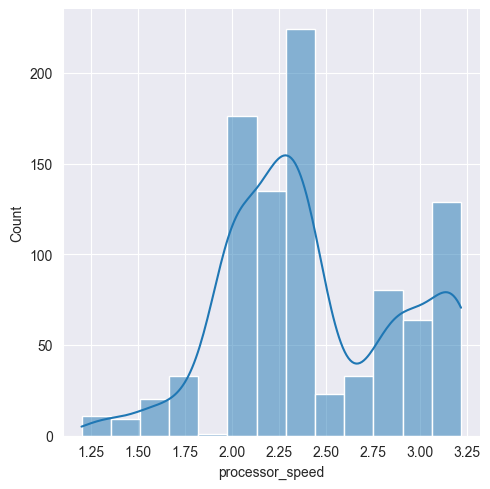

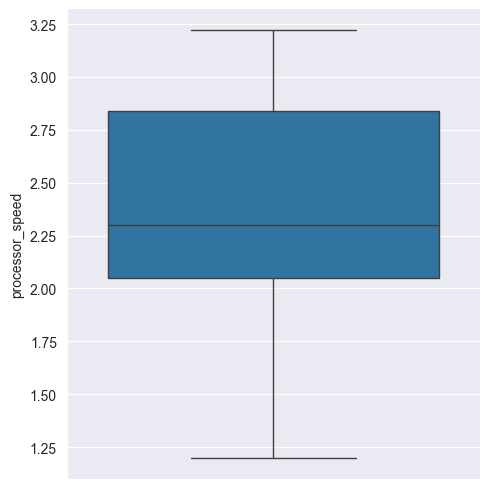

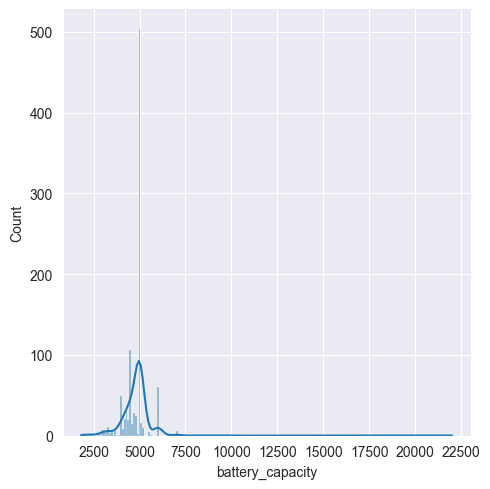

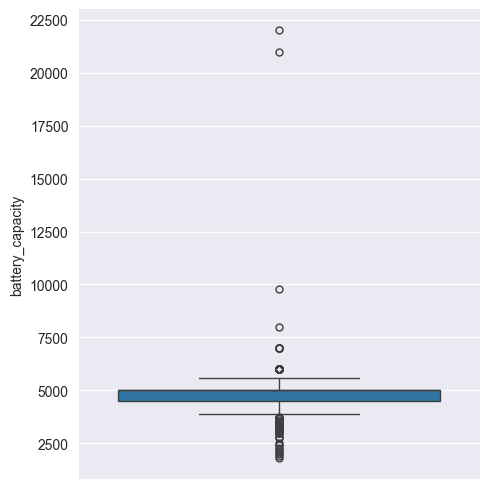

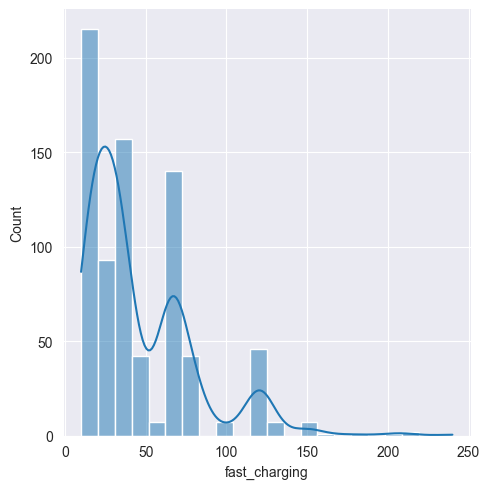

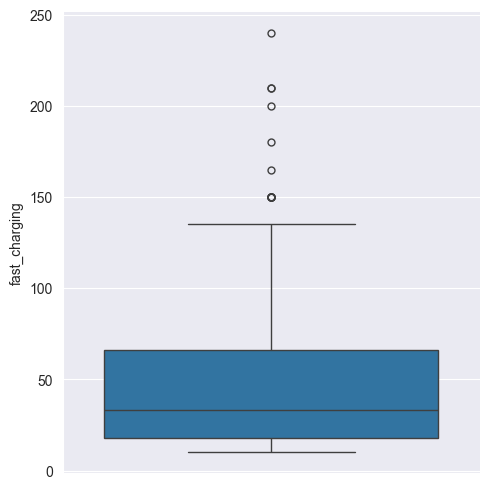

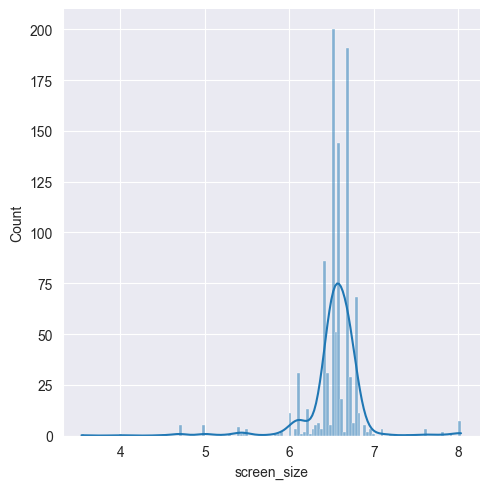

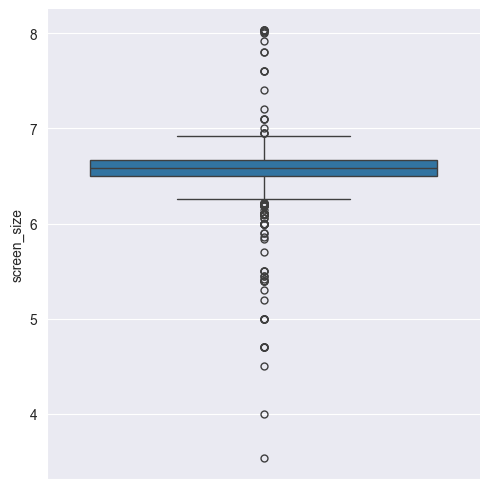

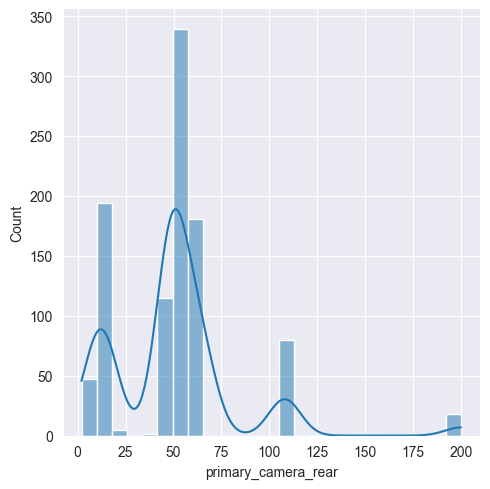

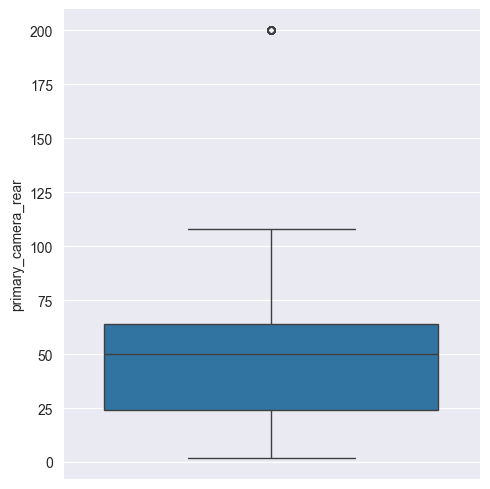

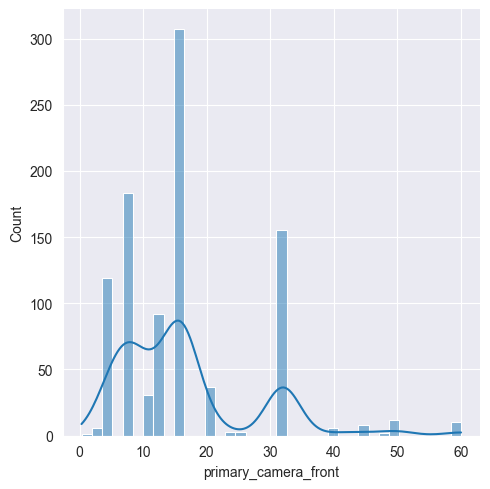

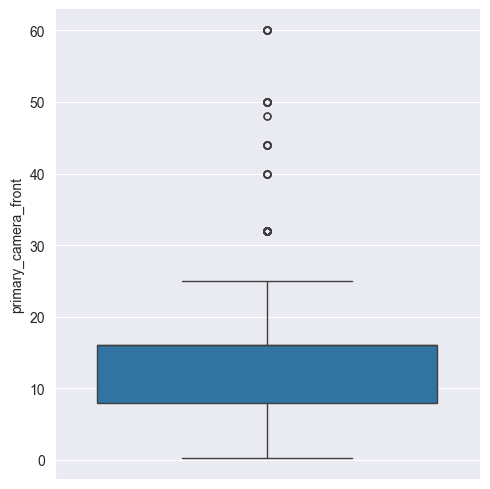

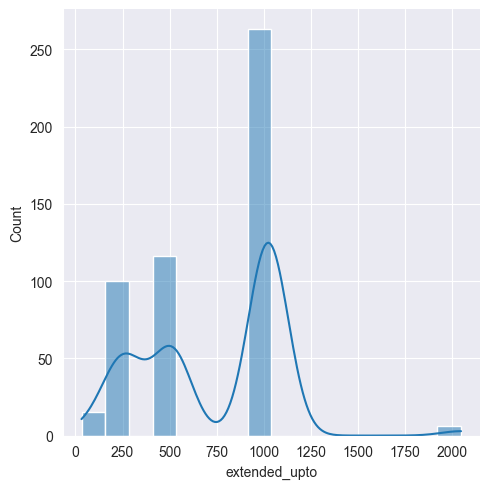

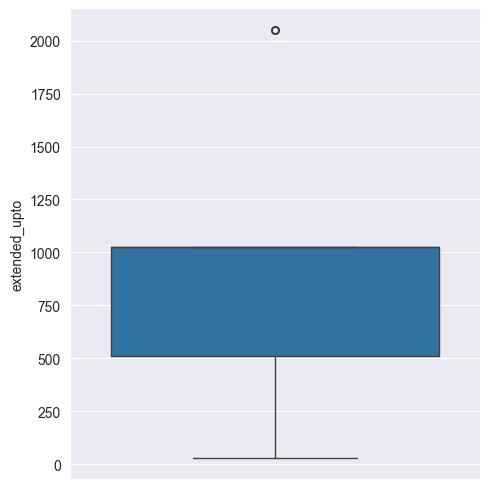

In [104]:
# battery_speed, fast_charging, screen_size, primary_camera_rear, primary_camera_front, extended_upto  has outliers

for col in num_cols:
    plot_graphs(col)

## Bi-Variate Analysis

what cols to choose highly depends on the problem statement. 

In our case, we are going to develop a ML model to predict price, so we will take that col and compare with all of them

In [105]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


### Price Vs brand_name

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'nothing'),
  Text(7, 0, 'oppo'),
  Text(8, 0, 'vivo'),
  Text(9, 0, 'poco'),
  Text(10, 0, 'iqoo'),
  Text(11, 0, 'jio'),
  Text(12, 0, 'gionee'),
  Text(13, 0, 'tecno'),
  Text(14, 0, 'tesla'),
  Text(15, 0, 'google'),
  Text(16, 0, 'infinix'),
  Text(17, 0, 'cola'),
  Text(18, 0, 'letv'),
  Text(19, 0, 'ikall'),
  Text(20, 0, 'leeco'),
  Text(21, 0, 'duoqin'),
  Text(22, 0, 'nokia'),
  Text(23, 0, 'lava'),
  Text(24, 0, 'honor'),
  Text(25, 0, 'nubia'),
  Text(26, 0, 'redmi'),
  Text(27, 0, 'asus'),
  Text(28, 0, 'itel'),
  Text(29, 0, 'royole'),
  Text(30, 0, 'so

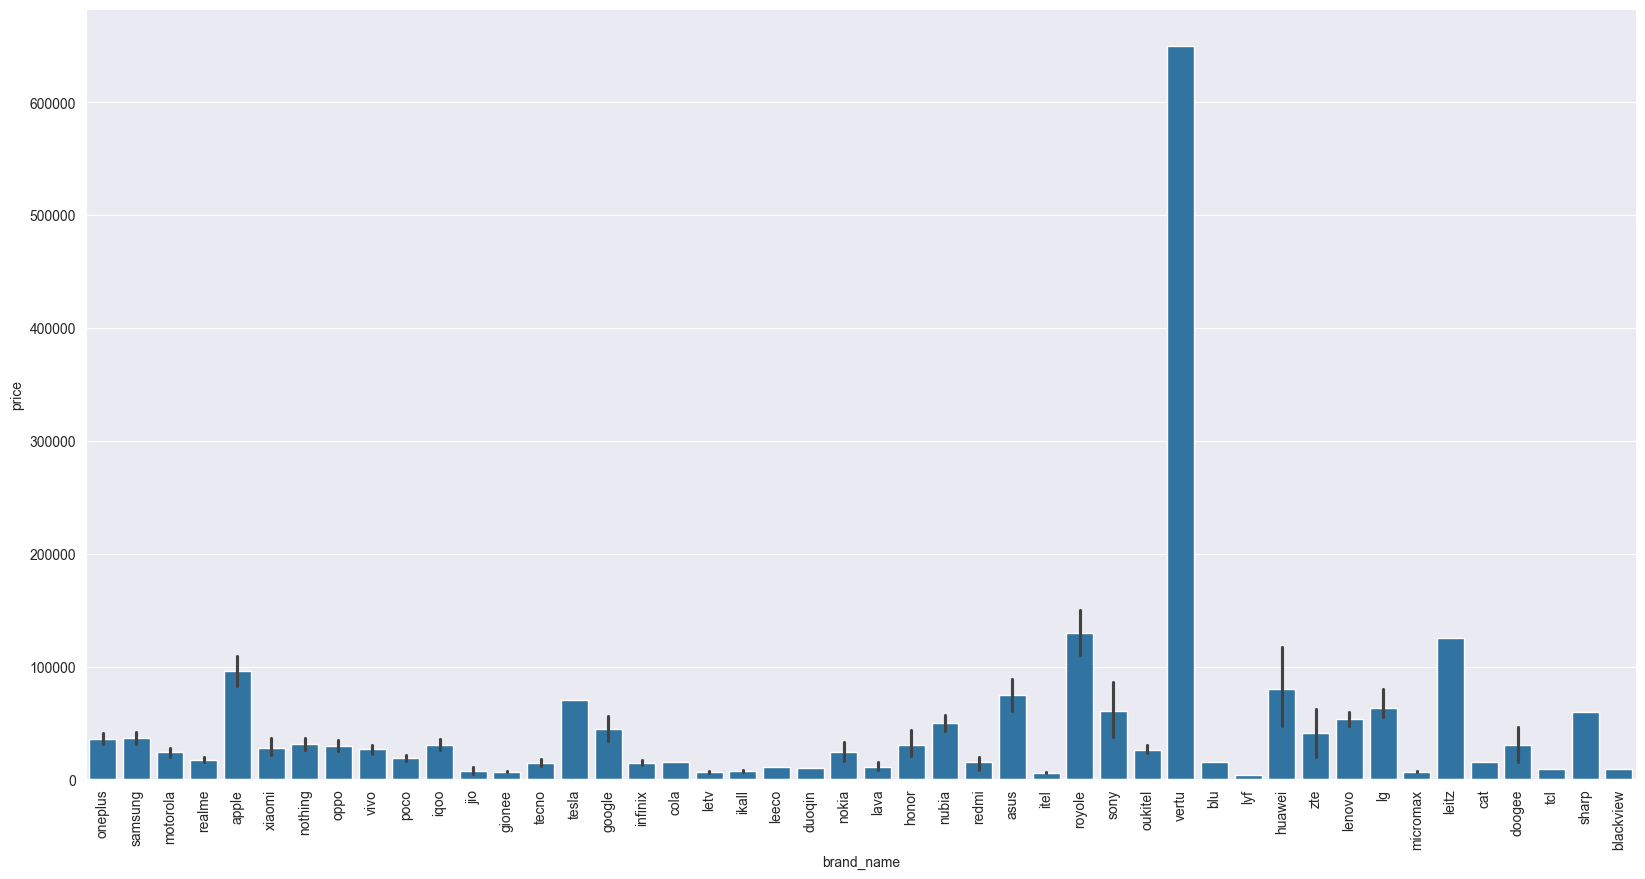

In [110]:
plt.figure(figsize=(20, 10))
sns.barplot(df, x='brand_name', y='price')
plt.xticks(rotation='vertical')
plt.show()

In [134]:
x = df.groupby('brand_name').count().sort_values(by='model', ascending=False)['model']
x[:5]

brand_name
xiaomi     134
samsung    132
vivo       111
realme      97
oppo        88
Name: model, dtype: int64

In [138]:
temp_df = df[df['brand_name'].isin(x[x > 10].index)].sort_values(by='price', ascending=False)
temp_df[:5]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.80,4000.0,1,27.0,8.0,256.0,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,0,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,8.0,3.20,4700.0,1,66.0,12.0,512.0,6.74,120,1212 x 2616,3,1.0,other,50.0,13.0,1,256.0
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,kirin,8.0,2.86,4500.0,1,NaN,12.0,512.0,6.53,60,1176 x 2400,4,2.0,android,40.0,32.0,1,256.0
458,xiaomi,Xiaomi Mi Mix Alpha,199990,NaN,True,False,False,snapdragon,8.0,2.96,4050.0,1,40.0,12.0,512.0,7.92,60,2088 x 2250,3,NaN,android,108.0,NaN,0,NaN
288,apple,Apple iPhone 14 Pro Max (1TB),182999,78.0,True,True,False,bionic,6.0,NaN,4323.0,1,NaN,6.0,1024.0,6.70,120,1290 x 2796,3,1.0,ios,48.0,12.0,0,NaN


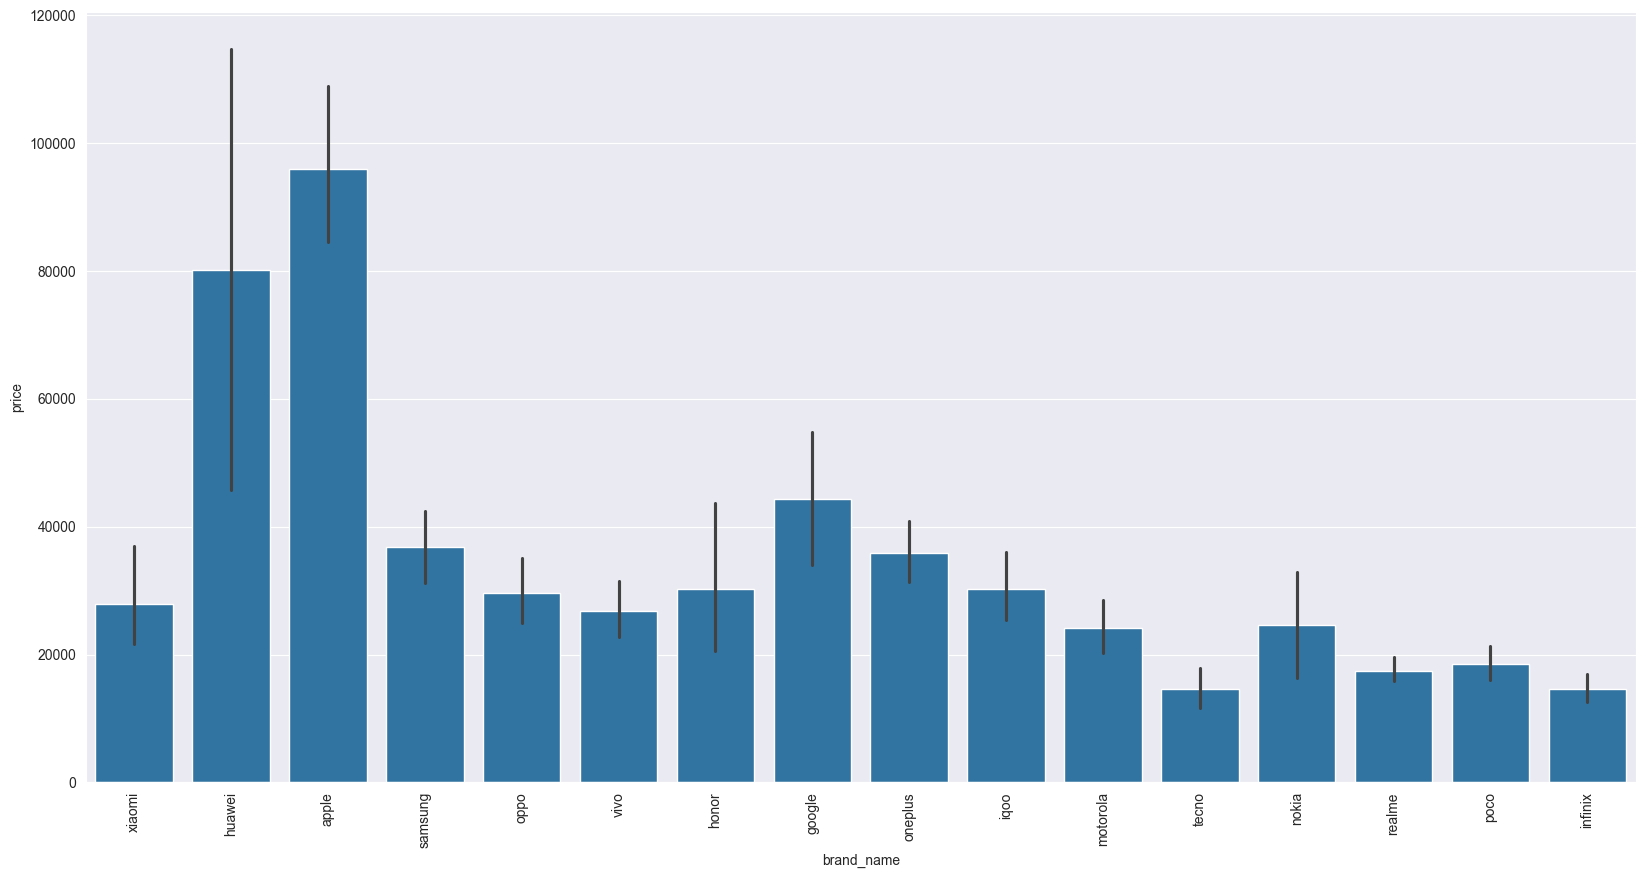

In [139]:
plt.figure(figsize=(20, 10))
sns.barplot(data=temp_df, x='brand_name', y='price')
plt.xticks(rotation='vertical')
plt.show()

In [141]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


### rating Vs price

<Axes: xlabel='rating', ylabel='price'>

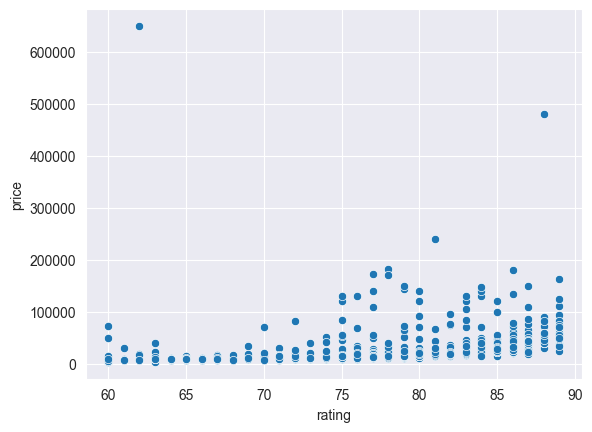

In [142]:
sns.scatterplot(df, x='rating', y='price')

### has_5g Vs price 

<Axes: xlabel='has_5g', ylabel='price'>

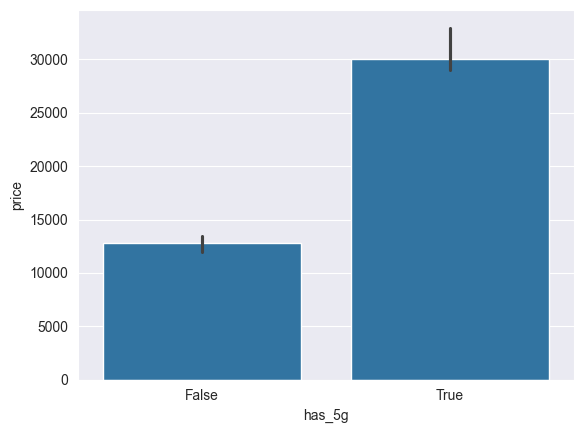

In [145]:
sns.barplot(df, x='has_5g', y='price', estimator=np.median)

### has_nfc Vs price

<Axes: xlabel='has_nfc', ylabel='price'>

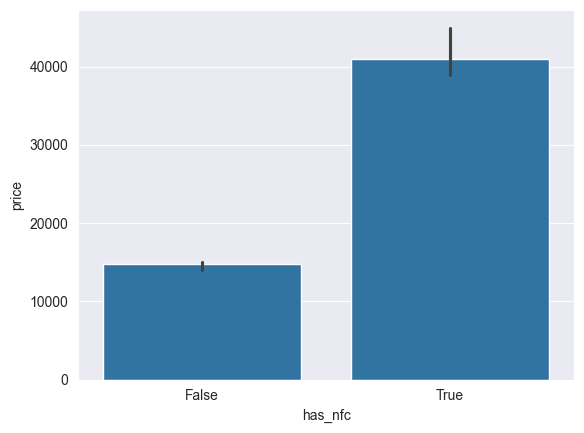

In [146]:
sns.barplot(df, x='has_nfc', y='price', estimator=np.median)

<Axes: xlabel='has_nfc', ylabel='price'>

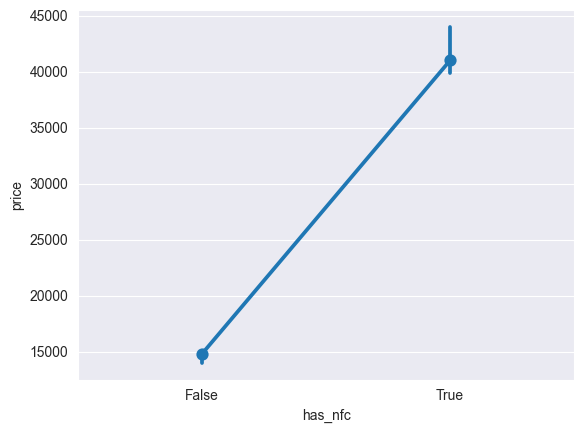

In [147]:
sns.pointplot(df, x='has_nfc', y='price', estimator=np.median)

### ir_blaster Vs price

<Axes: xlabel='has_ir_blaster', ylabel='price'>

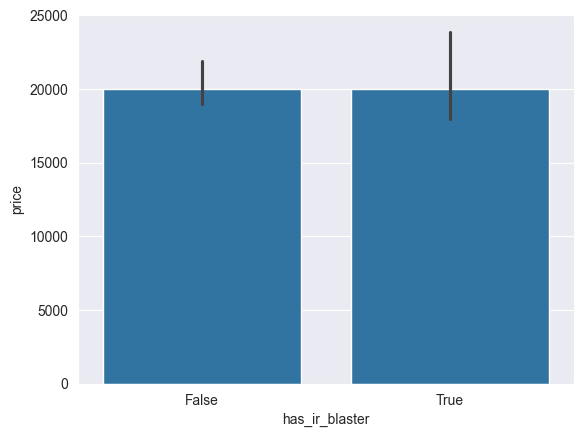

In [148]:
# not that useful, because they share almost the same price
sns.barplot(df, x='has_ir_blaster', y='price', estimator=np.median)

### processor_brand Vs price

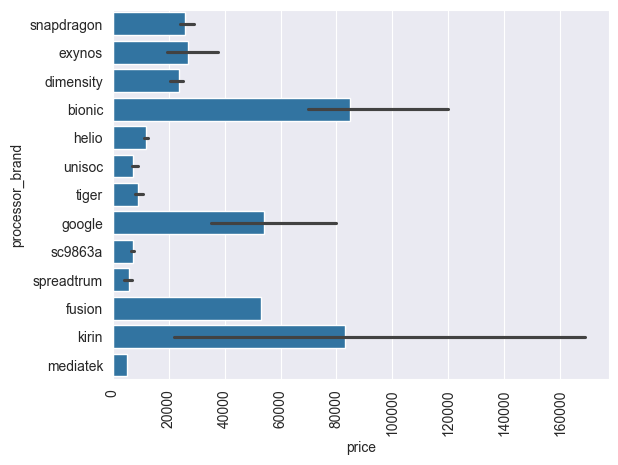

In [152]:
sns.barplot(df, y='processor_brand', x='price', estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

### num_cores Vs price

([0, 1, 2], [Text(0, 0, '4.0'), Text(1, 0, '6.0'), Text(2, 0, '8.0')])

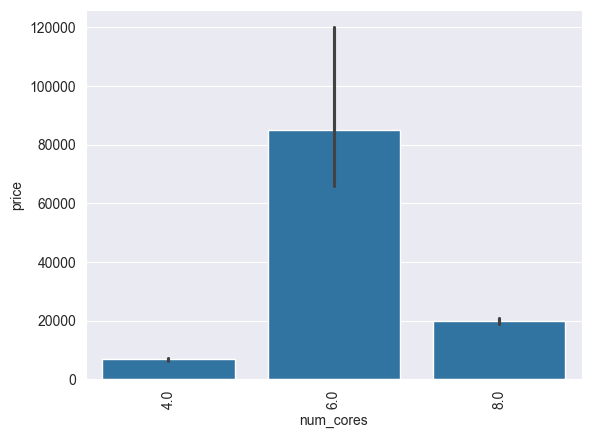

In [155]:
sns.barplot(df, x='num_cores', y='price', estimator=np.median)
plt.xticks(rotation='vertical')

In [156]:
# we can notice why num_cores 6 have high price. Below is the reason - ios 
print(pd.crosstab(df['num_cores'], df['os']))

os,android,ios,other
num_cores,,,
4.0,33,1,1
6.0,0,39,0
8.0,875,1,10


### processor_speed vs price

<Axes: xlabel='processor_speed', ylabel='price'>

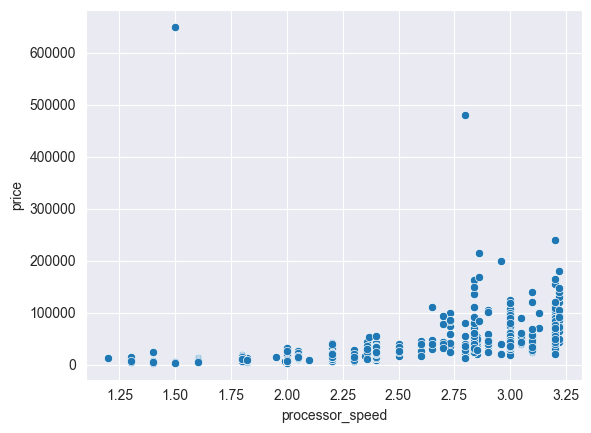

In [157]:
sns.scatterplot(df, x='processor_speed', y='price')

### screen_size vs price

<Axes: xlabel='screen_size', ylabel='price'>

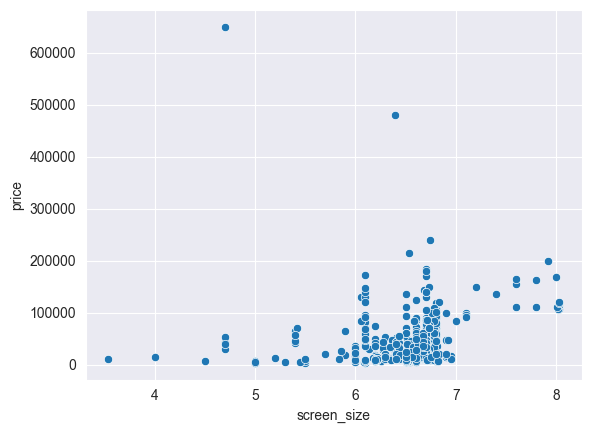

In [158]:
sns.scatterplot(df, x='screen_size', y='price')

<Axes: >

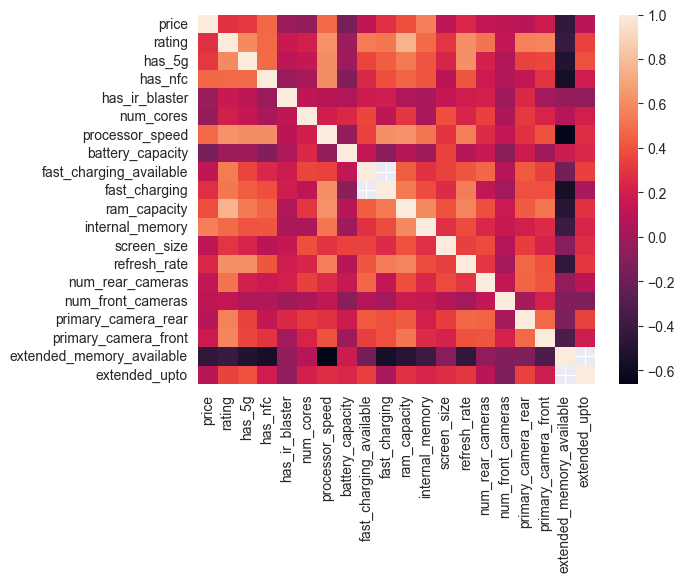

In [161]:
sns.heatmap(df.corr(numeric_only=True))

In [166]:
# with internal memory it has the highest
print(df.corr(numeric_only=True)['price'])

price                        1.000000
rating                       0.283504
has_5g                       0.305066
has_nfc                      0.470951
has_ir_blaster              -0.015807
num_cores                   -0.048561
processor_speed              0.474049
battery_capacity            -0.159232
fast_charging_available      0.116739
fast_charging                0.277591
ram_capacity                 0.386002
internal_memory              0.557168
screen_size                  0.113253
refresh_rate                 0.244115
num_rear_cameras             0.125330
num_front_cameras            0.115228
primary_camera_rear          0.092095
primary_camera_front         0.162995
extended_memory_available   -0.448628
extended_upto                0.091945
Name: price, dtype: float64


In [168]:
print(df.isnull().sum())

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64


In [171]:
print(df.corr(numeric_only=True)['rating'])

price                        0.283504
rating                       1.000000
has_5g                       0.596087
has_nfc                      0.474754
has_ir_blaster               0.156421
num_cores                    0.199741
processor_speed              0.628446
battery_capacity            -0.015581
fast_charging_available      0.542814
fast_charging                0.527613
ram_capacity                 0.757613
internal_memory              0.481070
screen_size                  0.298272
refresh_rate                 0.610795
num_rear_cameras             0.515531
num_front_cameras            0.131480
primary_camera_rear          0.562046
primary_camera_front         0.577861
extended_memory_available   -0.415265
extended_upto                0.346761
Name: rating, dtype: float64


### filling the ratings and other missing value cols using knn imputer

In [172]:
# 25 Dimensional
df.shape

(980, 25)

In [177]:
x_df = df.select_dtypes(include=['float64', 'int64']).drop(columns='price')
x_df.head()

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,89.0,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,3,1.0,50.0,16.0,0,NaN
1,81.0,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,3,1.0,64.0,16.0,1,1024.0
2,75.0,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,3,1.0,50.0,13.0,1,1024.0
3,81.0,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,3,1.0,50.0,16.0,1,1024.0
4,82.0,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,3,1.0,108.0,16.0,0,NaN


In [179]:
# knn imputer will fill all the missing values
from sklearn.impute import KNNImputer

imputer_obj = KNNImputer(n_neighbors=5)

In [181]:
x_df_values = imputer_obj.fit_transform(x_df)

In [184]:
x_df = pd.DataFrame(x_df_values, columns=x_df.columns)
x_df.isnull().sum()

rating                       0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
dtype: int64

In [185]:
x_df['price'] = df['price']

In [186]:
x_df.head()

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,price
0,89.0,8.0,3.2,5000.0,1.0,100.0,12.0,256.0,6.70,120.0,3.0,1.0,50.0,16.0,0.0,870.4,54999
1,81.0,8.0,2.2,5000.0,1.0,33.0,6.0,128.0,6.59,120.0,3.0,1.0,64.0,16.0,1.0,1024.0,19989
2,75.0,8.0,2.4,5000.0,1.0,15.0,4.0,64.0,6.60,90.0,3.0,1.0,50.0,13.0,1.0,1024.0,16499
3,81.0,8.0,2.2,5000.0,1.0,29.2,6.0,128.0,6.55,120.0,3.0,1.0,50.0,16.0,1.0,1024.0,14999
4,82.0,8.0,2.6,5000.0,1.0,67.0,6.0,128.0,6.70,120.0,3.0,1.0,108.0,16.0,0.0,1024.0,24999


In [191]:
a = x_df.corr(numeric_only=True)['price'].reset_index()
a.head()

,index,price
0,rating,0.341727
1,num_cores,-0.055949
2,processor_speed,0.488426
3,battery_capacity,-0.166257
4,fast_charging_available,0.116739


In [192]:
b = df.corr(numeric_only=True)['price'].reset_index()

In [194]:
print(b.merge(a, on='index'))

                        index   price_x   price_y
0                       price  1.000000  1.000000
1                      rating  0.283504  0.341727
2                   num_cores -0.048561 -0.055949
3             processor_speed  0.474049  0.488426
4            battery_capacity -0.159232 -0.166257
5     fast_charging_available  0.116739  0.116739
6               fast_charging  0.277591  0.220688
7                ram_capacity  0.386002  0.386002
8             internal_memory  0.557168  0.557168
9                 screen_size  0.113253  0.113253
10               refresh_rate  0.244115  0.244115
11           num_rear_cameras  0.125330  0.125330
12          num_front_cameras  0.115228  0.115787
13        primary_camera_rear  0.092095  0.092095
14       primary_camera_front  0.162995  0.160281
15  extended_memory_available -0.448628 -0.448628
16              extended_upto  0.091945 -0.004073


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

### one hot encoding on categorical cols

In [198]:
one_hot = pd.get_dummies(df, columns=['brand_name', 'processor_brand', 'os'], drop_first=True)
one_hot.head()

,model,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,brand_name_asus,brand_name_blackview,brand_name_blu,brand_name_cat,brand_name_cola,brand_name_doogee,brand_name_duoqin,brand_name_gionee,brand_name_google,brand_name_honor,brand_name_huawei,brand_name_ikall,brand_name_infinix,brand_name_iqoo,brand_name_itel,brand_name_jio,brand_name_lava,brand_name_leeco,brand_name_leitz,brand_name_lenovo,brand_name_letv,brand_name_lg,brand_name_lyf,brand_name_micromax,brand_name_motorola,brand_name_nokia,brand_name_nothing,brand_name_nubia,brand_name_oneplus,brand_name_oppo,brand_name_oukitel,brand_name_poco,brand_name_realme,brand_name_redmi,brand_name_royole,brand_name_samsung,brand_name_sharp,brand_name_sony,brand_name_tcl,brand_name_tecno,brand_name_tesla,brand_name_vertu,brand_name_vivo,brand_name_xiaomi,brand_name_zte,processor_brand_dimensity,processor_brand_exynos,processor_brand_fusion,processor_brand_google,processor_brand_helio,processor_brand_kirin,processor_brand_mediatek,processor_brand_sc9863a,processor_brand_snapdragon,processor_brand_spreadtrum,processor_brand_tiger,processor_brand_unisoc,os_ios,os_other
0,OnePlus 11 5G,54999,89.0,True,True,False,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,50.0,16.0,0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,64.0,16.0,1,1024.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,Samsung Galaxy A14 5G,16499,75.0,True,False,False,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,50.0,13.0,1,1024.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,Motorola Moto G62 5G,14999,81.0,True,False,False,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,50.0,16.0,1,1024.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,Realme 10 Pro Plus,24999,82.0,True,False,False,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,108.0,16.0,0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [202]:
print(one_hot.corr(numeric_only=True)['price'])

price                         1.000000
rating                        0.283504
has_5g                        0.305066
has_nfc                       0.470951
has_ir_blaster               -0.015807
num_cores                    -0.048561
processor_speed               0.474049
battery_capacity             -0.159232
fast_charging_available       0.116739
fast_charging                 0.277591
ram_capacity                  0.386002
internal_memory               0.557168
screen_size                   0.113253
refresh_rate                  0.244115
num_rear_cameras              0.125330
num_front_cameras             0.115228
primary_camera_rear           0.092095
primary_camera_front          0.162995
extended_memory_available    -0.448628
extended_upto                 0.091945
brand_name_asus               0.090566
brand_name_blackview         -0.019033
brand_name_blu               -0.014180
brand_name_cat               -0.014173
brand_name_cola              -0.014173
brand_name_doogee        